<figure>
  <IMG SRC="https://www.colorado.edu/cs/profiles/express/themes/cuspirit/logo.png" WIDTH=50 ALIGN="right">
</figure>
# Unbiased Estimators
*CSCI 3022 - Dirk Grunwald*

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson

## Estimators

When we observe data that we believe follows a "true distribution", we want to estimate the parameters of the true distribution.


For example, suppose we observe the number of cars passing though an intersection every hour. Let's assume that the number of cars is actually modeled by a Poisson distribution (it usually is). Our collected data might then look like this (I'm drawing a random parameter here and then generating a Poisson. Pretend this is real data).

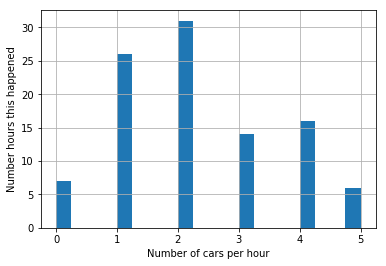

In [24]:
lamb = np.log(np.random.uniform(8,10))
cars = pd.Series( poisson(lamb).rvs(100))
cars.hist(bins=20)
plt.xlabel('Number of cars per hour')
plt.ylabel('Number hours this happened');

How do we recover the *parameter of interest* (lambda) that generated this data? There are a couple of different methods we could use, but the basic process is producing an *estimate* of the parameter.

**Estimate:** An estimate is a value *t* that only depends on the dataset $x_1, x_2, \ldots, x_n$. *i.e.* t is some function of the dataset only $$ t = g(x_1, x_2, \ldots, x_n) $$

In other words, we want to recover the parameter $\lambda$ solely from the data $x_1, x_2, \ldots, x_n$.

For the Poisson distribution, there are a couple of methods. Recall that

$$
Poi(\lambda,k) = \frac{e^{-\lambda} * \lambda^k}{k!}
$$

Then $Poi(\lambda,0) = e^{-\lambda}$. In other words, we could use the number of samples in column '0' above to estimate $\lambda$.

Alternatively, $E[X_n] = \lambda$ if the data comes from the Poisson distribution - and this can be used to estimate $\lambda$ directly. In fact, the variance of the Poisson is also $\lambda$. Which should be used? The probability of zero? The mean? The variance? Would all the estimates be the same?

**Estimator:** Let $t = h(x_1, x_2, \ldots, x_n)$ be an estimate based on the dataset $x_1, x_2, \ldots, x_n$. Then $t$ is a realization of the random variable $$ T = h(X_1, X_2, \ldots, X_n ).$$ The random variable $T$ is called an *estimator*.

Is one estimator better than another? Does there exist a best possible estimate?

**Unbiased Estimator:** A estimator $T$ is called *unbiased* for the parameter $\theta$ if $$E[T] = \theta$$ irrespective of the value of $\theta$. The difference of $E[T] - \theta$ is called the *bias* of $T$; if this difference is non-zero, the estimator is is *biased*.

Is one estimator better than another? Does there exist a best possible estimate?

## Estimating Parameters of the Poisson Distribution

The Poisson distribution is a discrete distribution that can model many real world  phenomena, such as the number of cars likely to pass through an intersection per hour or the number of raisans in a slice of raisan bread.

The definition of the Poisson distribution with parameter $\lambda$ and value $k$ is
$$
Poi(\lambda,k) = \frac{e^{-\lambda} * \lambda^k}{k!}
$$
Given a random sample that we believe is Poisson distributed, we would like to *estimate* the parameter $\lambda$.

In [3]:
lam=np.log(10)
print('Our lambda is', lam)
poi = poisson(lam)

Our lambda is 2.30258509299


In [4]:
pois = poi.rvs(30)

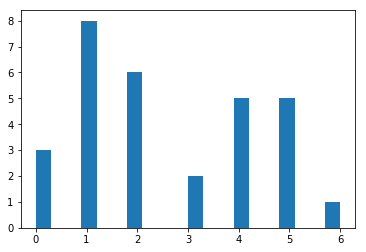

In [5]:
plt.hist(pois, bins=20);

## Estimating $\lambda$ using $S = \frac{\textrm{Number of $X_i$ equal to zero}}{n}$

The definition of the Poisson distribution with parameter $\lambda$ and value $k$ is
$$
Poi(\lambda,k) = \frac{e^{-\lambda} * \lambda^k}{k!}
$$
For $k=0$, this reduces to
$$
Poi(\lambda, k=0) = e^{-\lambda}
$$

In [6]:
print('The probability of p_0 is ', np.exp(-lam))

The probability of p_0 is  0.1


In [7]:
s = len(pois[pois == 0])/len(pois)
print('estimate of p_0 is', s)

estimate of p_0 is 0.1


$$
ln(s) = ln(e^{-\lambda})\\
ln(s) = -\lambda
$$

In [8]:
lam_est = -np.log(s)
print('We estimate lambda to be', lam_est)

We estimate lambda to be 2.30258509299


Now, repeat the single measurement above 500 times.

In [9]:
pest1 = np.array([ (len(p[p == 0])/len(p)) for p in [ poi.rvs(30) for junk in range(500)]])

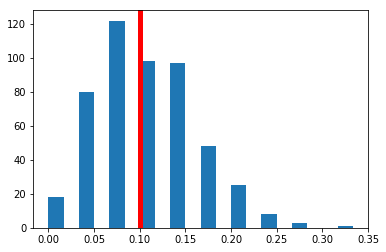

In [10]:
plt.hist(pest1, bins=20);
plt.axvline(np.exp(-lam),color='red',lw=5);


Our estimate using repeated observations would be

In [11]:
-np.log(np.mean(pest1))

2.3119622548066427

In [21]:
lam

2.3025850929940459

## Estimating $\lambda$ using $T=e^{-X_n}$

The second method depends on the observation that the mean of the Poisson distribution is $\lambda$.

In [13]:
np.mean(pois)

2.5666666666666669

Now, let's repeat this process 500 times and see the distribution of estimates of the mean.

In [14]:
pestt = -np.array( [ np.mean(poi.rvs(30)) for junk in range(500) ] )

In the below, the red line is "true" mean (based on the parameter we had set above) and the estimate mean (using our sampling)

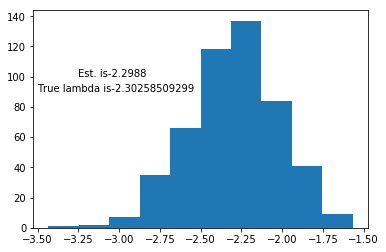

In [19]:
plt.hist(pestt)
plt.text(-3.25,100,'Est. is' + str(np.mean(pestt)))
plt.text(-3.5,90,'True lambda is' + str(-lam));